In [1]:
!pip install imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek


In [2]:
data = pd.read_csv('/content/Creditcard_data.csv')

print(data.head())
print(data['Class'].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
X = data.drop('Class', axis=1)
y = data['Class']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
sampling_methods = {
    "Sampling1_RandomOver": RandomOverSampler(),
    "Sampling2_RandomUnder": RandomUnderSampler(),
    "Sampling3_SMOTE": SMOTE(),
    "Sampling4_SMOTEENN": SMOTEENN(),
    "Sampling5_SMOTETomek": SMOTETomek()
}

In [5]:
models = {
    "M1_LogisticRegression": LogisticRegression(max_iter=1000),
    "M2_DecisionTree": DecisionTreeClassifier(),
    "M3_RandomForest": RandomForestClassifier(),
    "M4_SVM": SVC(),
    "M5_KNN": KNeighborsClassifier()
}

In [6]:
results = pd.DataFrame(index=models.keys(), columns=sampling_methods.keys())

for sample_name, sampler in sampling_methods.items():
    print(f"\nApplying {sample_name}...")

    X_resampled, y_resampled = sampler.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=42
    )

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        acc = accuracy_score(y_test, predictions) * 100

        results.loc[model_name, sample_name] = round(acc, 2)

results


Applying Sampling1_RandomOver...

Applying Sampling2_RandomUnder...

Applying Sampling3_SMOTE...

Applying Sampling4_SMOTEENN...

Applying Sampling5_SMOTETomek...


,Sampling1_RandomOver,Sampling2_RandomUnder,Sampling3_SMOTE,Sampling4_SMOTEENN,Sampling5_SMOTETomek
M1_LogisticRegression,91.7,16.67,91.92,94.53,91.7
M2_DecisionTree,98.25,66.67,97.82,97.95,97.6
M3_RandomForest,100.0,33.33,98.91,100.0,99.34
M4_SVM,96.51,16.67,96.94,99.32,96.94
M5_KNN,96.51,16.67,94.32,97.27,94.54


In [7]:
print("\nAccuracy Comparison Table (%):")
display(results)


Accuracy Comparison Table (%):


,Sampling1_RandomOver,Sampling2_RandomUnder,Sampling3_SMOTE,Sampling4_SMOTEENN,Sampling5_SMOTETomek
M1_LogisticRegression,91.7,16.67,91.92,94.53,91.7
M2_DecisionTree,98.25,66.67,97.82,97.95,97.6
M3_RandomForest,100.0,33.33,98.91,100.0,99.34
M4_SVM,96.51,16.67,96.94,99.32,96.94
M5_KNN,96.51,16.67,94.32,97.27,94.54


In [8]:
best_sampling = results.astype(float).idxmax(axis=1)

print("\nBest Sampling Technique for Each Model:")
print(best_sampling)


Best Sampling Technique for Each Model:
M1_LogisticRegression      Sampling4_SMOTEENN
M2_DecisionTree          Sampling1_RandomOver
M3_RandomForest          Sampling1_RandomOver
M4_SVM                     Sampling4_SMOTEENN
M5_KNN                     Sampling4_SMOTEENN
dtype: object


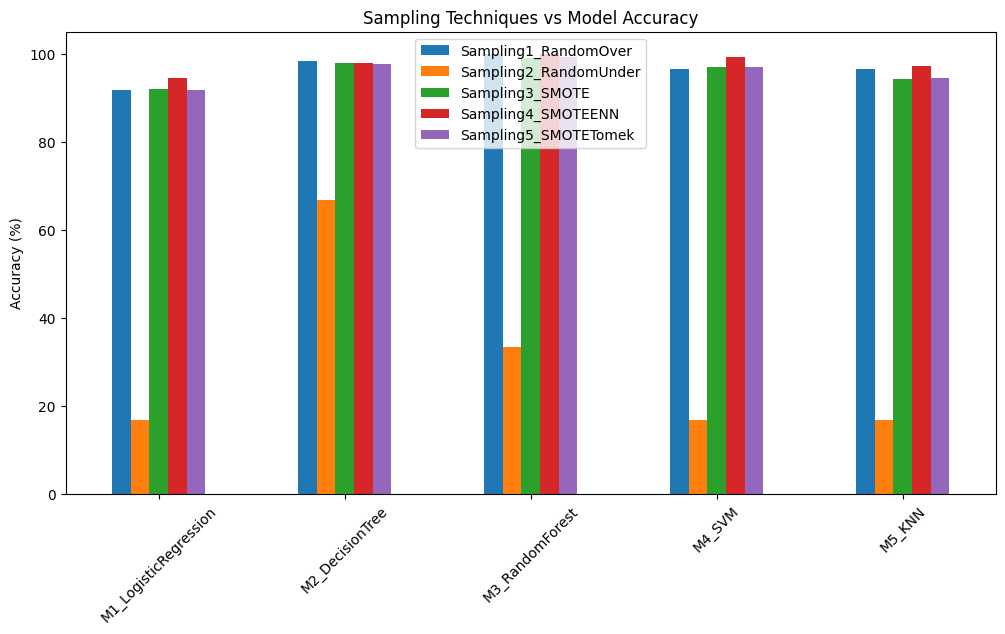

In [9]:
results.astype(float).plot(kind='bar', figsize=(12,6))
plt.title("Sampling Techniques vs Model Accuracy")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.show()